## reference - https://hub.docker.com/r/challisa/easyocr

In [1]:
%%bash
pip install --no-cache-dir easyocr
pip install confluent_kafka

  Using cached confluent_kafka-1.6.1-cp38-cp38-manylinux2010_x86_64.whl (2.7 MB)


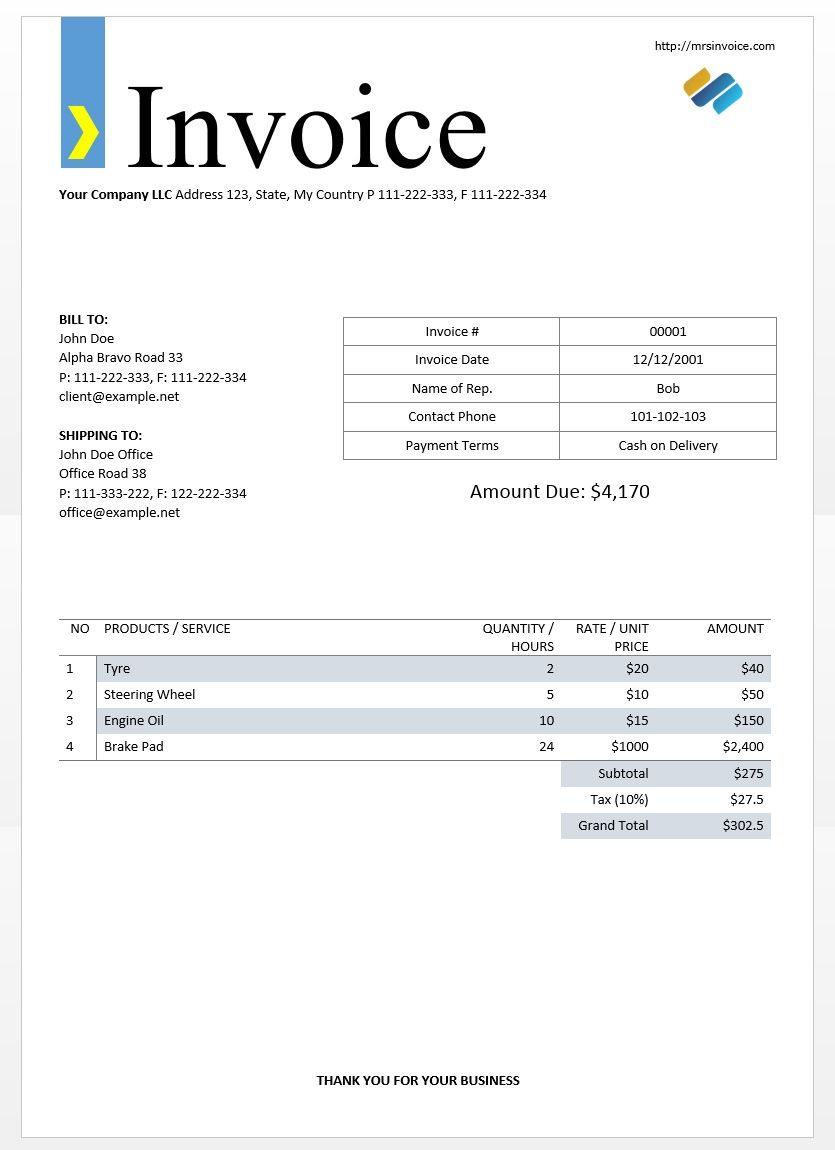

In [2]:
from IPython.display import Image
Image('image.jpg')

In [3]:
import easyocr
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('image.jpg')
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[652, 38], [779, 38], [779, 56], [652, 56]],
  'http:/ {mrsinvoice.com',
  0.6191263480172272),
 ([[115, 71], [501, 71], [501, 183], [115, 183]],
  'Invoice',
  0.8417029914472208),
 ([[57, 187], [251, 187], [251, 203], [57, 203]],
  'Your Company LLC Address 123_',
  0.9699016629589228),
 ([[255, 189], [289, 189], [289, 203], [255, 203]],
  'State_',
  0.9993438719407953),
 ([[293, 187], [367, 187], [367, 203], [293, 203]],
  'My Country',
  0.7690886052828926),
 ([[377, 187], [549, 187], [549, 203], [377, 203]],
  '111-222-333,F 111-222-334',
  0.8944311753337679),
 ([[59, 313], [111, 313], [111, 327], [59, 327]],
  'BILL TO:',
  0.6356406546240435),
 ([[425, 325], [483, 325], [483, 339], [425, 339]],
  'Invoice #',
  0.811387206387055),
 ([[649, 325], [689, 325], [689, 339], [649, 339]],
  'O0001',
  0.26906153742125555),
 ([[57, 333], [117, 333], [117, 347], [57, 347]],
  'Jonn Doe',
  0.704675871144001),
 ([[59, 351], [185, 351], [185, 367], [59, 367]],
  'Alpha Bravo Road 33',

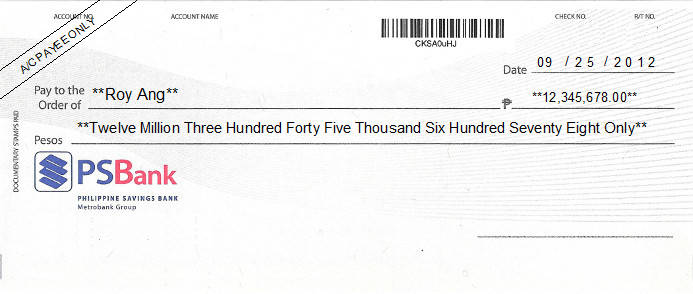

In [11]:
from IPython.display import Image
Image('cheque.jpeg')

In [15]:
import base64
from PIL import Image
from io import BytesIO
import json

image = 'cheque.jpeg'

encoded_image = base64.b64encode(open("cheque.jpeg","rb").read())

reader = easyocr.Reader(['en']) # need to run only once to load model into memory

result = reader.readtext(image)

message = json.dumps({"pay_to" : result[6][1],
                      "amount" : result[7][1],
                      "amount_in_words" : result[9][1],
                      "currency" : result[10][1],
                      "bank" : result[11][1],
                      "encoded_image" : encoded_image.decode('utf-8')})
message

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'{"pay_to": "Roy Ang", "amount": "**12,345,678.00**", "amount_in_words": "**Twelve Million Three Hundred Forty Five Thousand Six Hundred Seventy Eight Only**", "currency": "Pesos", "bank": "PSBank", "encoded_image": "/9j/4AAQSkZJRgABAQEASABIAAD//gATQ3JlYXRlZCB3aXRoIEdJTVD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAEmArUDAREAAhEBAxEB/8QAGgABAQADAQEAAAAAAAAAAAAAAAECAwQFBv/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB+xABAAADiN5uBgcp2GRAAAAAAAAAAAAAAAAAAAAUgAAAAAAAAAAKAAZEAAMTUDWcp6BtKcxDqIUENZgDEpTaZApAUhQCAhQAUAAAAAAAAAhQAaTEGBuMiFANRiU3AAGQAANZznOZmcctnsLxnQbAACnKUxIQh0m0AgKAQpCkBQQFPPMTE802A6DM4DpIdJynacZyn1AICkNJzmwxNxmUAHOZGo6yFAMoUABgcpujkOSvUMDsAAAAKAQpACgAAEABSAAp5BgazxDoNZ2m48g7TE7ThPUPNPPPvQQEIACFBCgAAxMiFABQU5zEsc1ZG5Ml6AAAAAAACGQAIUEAKCFIACnnGJgeabTA6TYcB0EOk5jtOI4z6wEIAAAAQFBCgEKQyNYhQ5DecUumzuQvWZgAAAAAAAAAFAIUhSFABCgAA1n

In [16]:
received_image = json.loads(message)['encoded_image']
im = Image.open(BytesIO(base64.b64decode(received_image)))
im.save('image1.png', 'PNG')
received_image

'/9j/4AAQSkZJRgABAQEASABIAAD//gATQ3JlYXRlZCB3aXRoIEdJTVD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAEmArUDAREAAhEBAxEB/8QAGgABAQADAQEAAAAAAAAAAAAAAAECAwQFBv/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB+xABAAADiN5uBgcp2GRAAAAAAAAAAAAAAAAAAAAUgAAAAAAAAAAKAAZEAAMTUDWcp6BtKcxDqIUENZgDEpTaZApAUhQCAhQAUAAAAAAAAAhQAaTEGBuMiFANRiU3AAGQAANZznOZmcctnsLxnQbAACnKUxIQh0m0AgKAQpCkBQQFPPMTE802A6DM4DpIdJynacZyn1AICkNJzmwxNxmUAHOZGo6yFAMoUABgcpujkOSvUMDsAAAAKAQpACgAAEABSAAp5BgazxDoNZ2m48g7TE7ThPUPNPPPvQQEIACFBCgAAxMiFABQU5zEsc1ZG5Ml6AAAAAAACGQAIUEAKCFIACnnGJgeabTA6TYcB0EOk5jtOI4z6wEIAAAAQFBCgEKQyNYhQ5DecUumzuQvWZgAAAAAAAAAFAIUhSFABCgAA1njEMiG09YyAABiQAAAAhQCkIUgAMjUZGk0mccZss3qOoFBTIAAAAAAAAAAAAoIACgAAAhSFBAAQAgKQAAAAAEKQpCkIcZtNUaTt1NMu03FIACGRTIAAAAAAAAAAAFBACkABSAoIQAAAgB4xie2c0u65802S9mppl6I4LNC+tHJpoj1SGRCHBHZXHHPZ2mtespQQFiVQAUyBQAAAAAAAAAAAAU

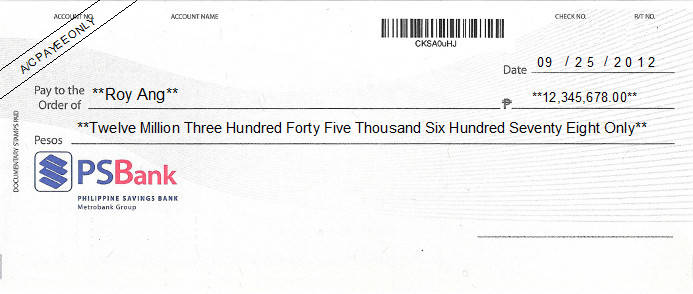

In [26]:
im

In [21]:
import base64
from PIL import Image
from io import BytesIO
import easyocr

import uuid

from confluent_kafka import Producer, Consumer
import json


p = Producer({
    'bootstrap.servers': 'broker:9092'
})


def acked(err, msg):
    """Delivery report callback called (from flush()) on successful or failed delivery of the message."""
    if err is not None:
        print("failed to deliver message: {}".format(err.str()))
    else:
        print("produced to: {} [{}] @ {}".format(msg.topic(), msg.partition(), msg.offset()))


image = 'cheque.jpeg'

with open(image, "rb") as image_file:
    data = base64.b64encode(image_file.read())

reader = easyocr.Reader(['en']) # need to run only once to load model into memory

result = reader.readtext(image)

message = json.dumps({"pay_to" : result[6][1],
                      "amount" : result[7][1],
                      "amount_in_words" : result[9][1],
                      "currency" : result[10][1],
                      "bank" : result[11][1],
                      "encoded_image" : encoded_image.decode('utf-8')})

p.produce('ocr-cheque-processing', value=message, callback=acked)


# flush() is typically called when the producer is done sending messages to wait
# for outstanding messages to be transmitted to the broker and delivery report
# callbacks to get called. For continous producing you should call p.poll(0)
# after each produce() call to trigger delivery report callbacks.
p.flush(10)

c = Consumer({
    'bootstrap.servers': 'broker:9092',
    'group.id': str(uuid.uuid1()),  # this will create a new consumer group on each invocation.
    'auto.offset.reset': 'earliest'
})

c.subscribe(['ocr-cheque-processing'])

received_message = {}

try:
    while True:
        msg = c.poll(0.1)  # Wait for message or event/error
        if msg is None:
            # No message available within timeout.
            # Initial message consumption may take up to `session.timeout.ms` for
            #   the group to rebalance and start consuming.
            continue
        if msg.error():
            # Errors are typically temporary, print error and continue.
            print("Consumer error: {}".format(msg.error()))
            continue

        print('consumed: {}'.format(msg.value()))
        
        received_message = json.loads(msg.value())
        received_image_string = received_message['encoded_image']
        received_image = Image.open(BytesIO(base64.b64decode(received_image_string)))
        received_image.save('received_image.png', 'PNG')

except KeyboardInterrupt:
    pass

finally:
    # Leave group and commit final offsets
    c.close()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


produced to: ocr-cheque-processing [0] @ 2
consumed: b'{"pay_to": "Roy Ang", "amount": "**12,345,678.00**", "amount_in_words": "**Twelve Million Three Hundred Forty Five Thousand Six Hundred Seventy Eight Only**", "currency": "Pesos", "bank": "PSBank", "encoded_image": "/9j/4AAQSkZJRgABAQEASABIAAD//gATQ3JlYXRlZCB3aXRoIEdJTVD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAEmArUDAREAAhEBAxEB/8QAGgABAQADAQEAAAAAAAAAAAAAAAECAwQFBv/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB+xABAAADiN5uBgcp2GRAAAAAAAAAAAAAAAAAAAAUgAAAAAAAAAAKAAZEAAMTUDWcp6BtKcxDqIUENZgDEpTaZApAUhQCAhQAUAAAAAAAAAhQAaTEGBuMiFANRiU3AAGQAANZznOZmcctnsLxnQbAACnKUxIQh0m0AgKAQpCkBQQFPPMTE802A6DM4DpIdJynacZyn1AICkNJzmwxNxmUAHOZGo6yFAMoUABgcpujkOSvUMDsAAAAKAQpACgAAEABSAAp5BgazxDoNZ2m48g7TE7ThPUPNPPPvQQEIACFBCgAAxMiFABQU5zEsc1ZG5Ml6AAAAAAACGQAIUEAKCFIACnnGJgeabTA6TYcB0EOk5jtOI4z6wEIA

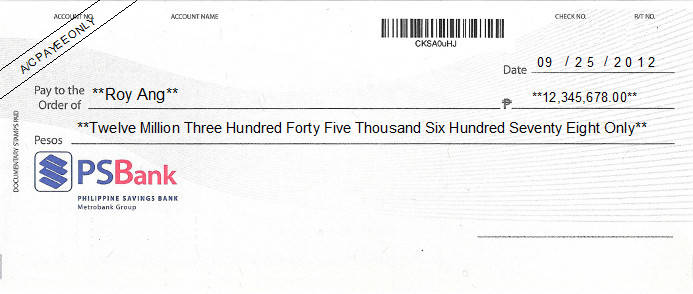

In [34]:
received_image